<a href="https://colab.research.google.com/github/Sriram-764/Data-Warehousing-and-Data-Mining/blob/main/DWDM_Experiment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('collegePlace.csv')
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Stream'] = encoder.fit_transform(data['Stream'])

In [16]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data['CGPA'], data['PlacedOrNot'])
print(corr)

0.5886480477350889


In [17]:
from sklearn.model_selection import train_test_split
x = data.drop(columns = ['PlacedOrNot', 'Hostel',])
y = data['PlacedOrNot']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.3)

In [18]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:
predictions = decision_tree.predict(x_test)

<Axes: >

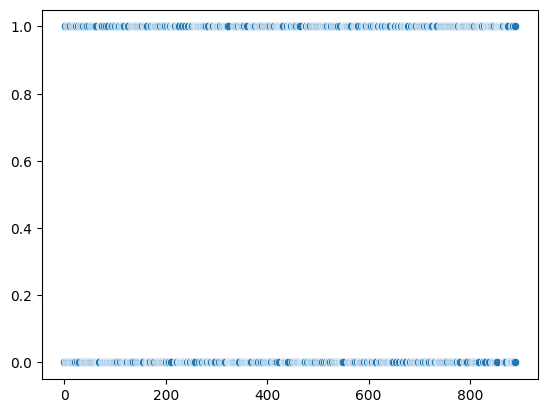

In [23]:
import seaborn as sns
sns.scatterplot(predictions)

In [22]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(predictions, y_test)

print(acc)

0.8685393258426967
